# GA iteration 1

Best weights:  [0.9978730470519959, 0.9947561855131267, 0.9990320800297463]
Best weights:  [0.9997800584135184, 0.9984759297927484, 0.9996389533033687]
Best weights:  [0.9997549110288629, 0.9982099811164279, 0.9990875389067644]
Best weights:  [0.996762612692962, 0.9999075419666992, 0.9997798706801143]
Best weights:  [0.9997441491201492, 0.9997226525068444, 0.9990660867638449]
Best weights:  [0.9957605399551438, 0.9998415069207282, 0.9986211416638255]
Best weights:  [0.999939388429008, 0.9981127238929828, 0.9981500269388697]
Best weights:  [0.9993474880879665, 0.9987173831949463, 0.998902802332731]
Best weights:  [0.9979892044154124, 0.9997499960008184, 0.9976733831238846]
Best weights:  [0.9947140538230895, 0.996799755459659, 0.9999629487167967]
Best weights:  [0.998462859623162, 0.9958341928866332, 0.9992066748066334]
Best weights:  [0.99886594539722, 0.999953567322574, 0.9946639014826364]
Best weights:  [0.9994842490863509, 0.9967628054747579, 0.9962633765410326]
Best weights:  [0.99

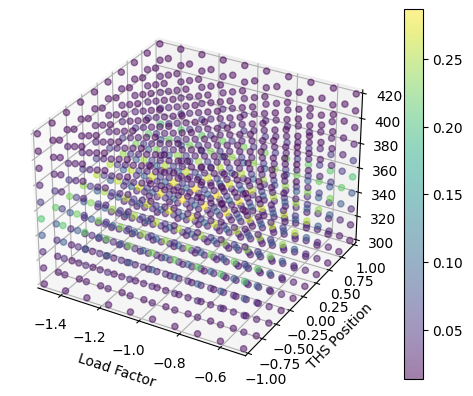

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

# Define the objective function
def objective(LF, LF_lim, THS, THS_trim, V, V_stab, w1, w2, w3):
    return w1*abs(LF-LF_lim) + w2*abs(THS-THS_trim) + w3*abs(V-V_stab)

# Define the cost function
def calculate_cost(population, LF, LF_lim, THS, THS_trim, V, V_stab):
    costs = []
    for p in population:
        w1, w2, w3 = p
        f = objective(LF, LF_lim, THS, THS_trim, V, V_stab, w1, w2, w3)
        costs.append(1/(f + 1e-10)) # Add a small constant to avoid division by zero
    return costs

# Define the genetic algorithm
def genetic_algorithm(population_size, generations, LF, LF_lim, THS, THS_trim, V, V_stab):
    # Define the initial population
    population = []
    for i in range(population_size):
        w1 = random.uniform(0, 1)
        w2 = random.uniform(0, 1)
        w3 = random.uniform(0, 1)
        population.append([w1, w2, w3])

    # Run the genetic algorithm for the defined number of generations
    for i in range(generations):
        # Evaluate the cost of the population
        costs = calculate_cost(population, LF, LF_lim, THS, THS_trim, V, V_stab)

        # Select parents for crossover
        parents = []
        for j in range(population_size):
            parent1 = population[random.randint(0, population_size-1)]
            parent2 = population[random.randint(0, population_size-1)]
            if costs[population.index(parent1)] < costs[population.index(parent2)]:
                parents.append(parent1)
            else:
                parents.append(parent2)

        # Create new population through crossover and mutation
        new_population = []
        for j in range(population_size):
            parent1 = parents[random.randint(0, population_size-1)]
            parent2 = parents[random.randint(0, population_size-1)]
            child = []
            for k in range(len(parent1)):
                if random.random() < 0.5:
                    child.append(parent1[k])
                else:
                    child.append(parent2[k])
            for k in range(len(child)):
                if random.random() < 0.1:
                    child[k] = random.uniform(0, 1)
            new_population.append(child)

        # Replace the old population with the new population
        population = new_population

    # Evaluate the cost of the final population
    costs = calculate_cost(population, LF, LF_lim, THS, THS_trim, V, V_stab)

    # Return the weighting factors that result in the lowest cost
    best_weights = population[costs.index(min(costs))]
    return best_weights

# Set the input parameters
population_size = 200
generations = 100
#LF = -1.1
LF_lim = -1.0
#THS = 0.5
THS_trim = 0.0
THS_range = 1.0
#V = 350.0
V_stab = 350.0
V_range = 100.0

# Call the genetic algorithm function and store the costs
costs = {}
LF_bound = np.linspace(-1.5, -0.5, 10)
THS_bound = np.linspace(-1.0, 1.0, 10)
V_bound = np.linspace(300.0, 420.0, 10)

grid = []
for i in LF_bound:
    for j in THS_bound:
        for k in V_bound:
            grid.append([i,j,k])
#print(grid)

for ele in grid:
    best_weights = genetic_algorithm(population_size, generations, ele[0] , LF_lim, ele[1], THS_trim, ele[2], V_stab)
    #Print the best weights
    print("Best weights: ", best_weights)
    cost = 1/(objective(ele[0] , LF_lim, ele[1], THS_trim, ele[2], V_stab, *best_weights) + 1e-10)
    costs[cost] = ele
#print(costs)

fig = plt.figure()
ax = plt.axes(projection='3d')
x = [c[0] for c in costs.values()]
y = [c[1] for c in costs.values()]
z = [c[2] for c in costs.values()]
c = list(costs.keys())
sc = ax.scatter(x, y, z, c=c, cmap='viridis', alpha=0.5)
ax.set_xlabel('Load Factor')
ax.set_ylabel('THS Position')
ax.set_zlabel('Airspeed')
ax.set_xlim(-1.5, -0.5)
ax.set_ylim(-1.0, 1.0)
ax.set_zlim(300.0, 420.0)
fig.colorbar(sc)
plt.show()

# GA iteration 2


>0, new best f([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0]) = -10.000
>0, new best f([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]) = -11.000
>0, new best f([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1]) = -15.000
>1, new best f([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1]) = -16.000
>3, new best f([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1]) = -17.000
>4, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]) = -19.000
>9, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = -20.000


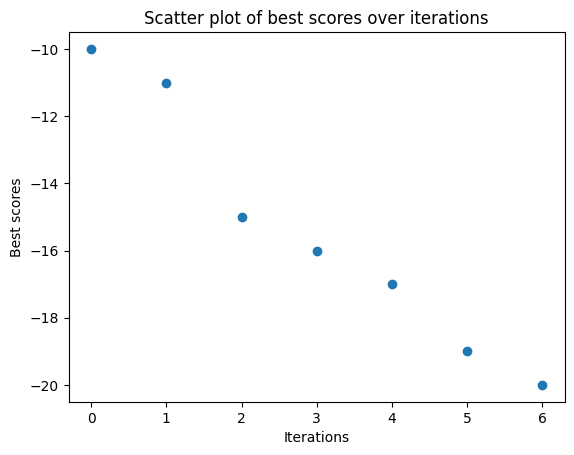

In [2]:
from numpy.random import randint
from numpy.random import rand
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

# define the total iterations
n_iter = 100
# bits
n_bits = 20
# define the population size
n_pop = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / float(n_bits)

# objective function
def onemax(x):
    return -sum(x)

# tournament selection
def selection(pop, scores, k=3):
    # first random selection
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k-1):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

# crossover two parents to create two children
def crossover(p1, p2, r_cross):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if rand() < r_cross:
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

# mutation operator
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if rand() < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]

# genetic algorithm
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut):
    # initial population of random bitstring
    pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    # keep track of best solution
    best, best_eval = 0, objective(pop[0])
    best_scores = []
    # enumerate generations
    for gen in range(n_iter):
        # evaluate all candidates in the population
        scores = [objective(c) for c in pop]
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %.3f" % (gen,  pop[i], scores[i]))
                best_scores.append(best_eval)
        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]
        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
    return [best, best_eval, best_scores]

# perform the genetic algorithm search
best, score, best_scores = genetic_algorithm(onemax, n_bits, n_iter, n_pop, r_cross, r_mut)

# plot the best scores over iterations
plt.scatter(x=range(len(best_scores)), y=best_scores)
plt.title('Scatter plot of best scores over iterations')
plt.xlabel('Iterations')
plt.ylabel('Best scores')
plt.show()


# GA iteration 3

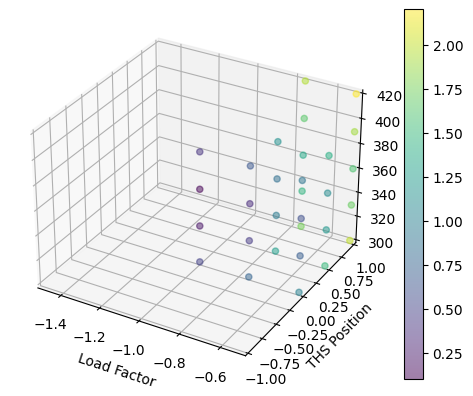

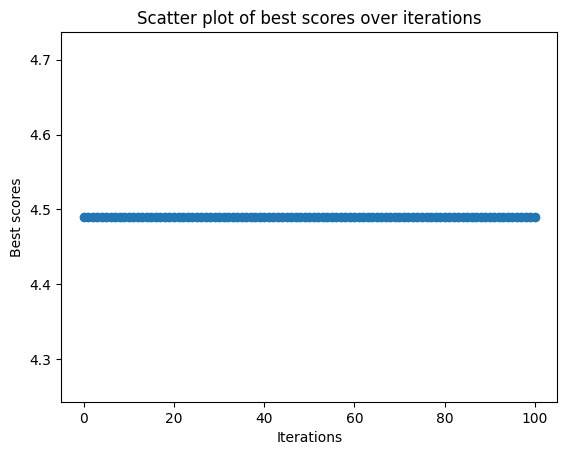

In [3]:
# genetic algorithm search of the one max optimization problem
from numpy.random import randint
from numpy.random import rand
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

# Define the objective function for optimization
def objective(x):
    LF = x[0]
    THS = x[1]
    V = x[2]
    LF_lim = -1.0
    THS_trim = 0.0
    THS_range = 1.0
    V_stab = 350.0
    V_range = 100.0
    w1 = 1.0
    w2 = 1.0
    w3 = 1.0
    return w1*abs((LF-LF_lim)/LF_lim) + w2*abs((THS-THS_trim)/THS_range) + w3*abs((V-V_stab)/V_range)

# tournament selection
def selection(pop, scores, k=3):
    # first random selection
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k-1):
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

# crossover two parents to create two children
def crossover(p1, p2, r_cross):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if rand() < r_cross:
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-1)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

# mutation operator
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if rand() < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]

# genetic algorithm
def genetic_algorithm( n_bits, n_iter, n_pop, r_cross, r_mut):
    # initial population of random bitstring
    pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    # keep track of best solution and score in each iteration
    best, best_eval = 0, objective(pop[0])
    best_scores = [best_eval]
    # enumerate generations
    for gen in range(n_iter):
        # evaluate all candidates in the population
        scores = [objective(c) for c in pop]
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %.3f" % (gen,  pop[i], scores[i]))
        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]
        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
        # add best score to list
        best_scores.append(best_eval)
    return [best, best_eval, best_scores]


# define the total iterations
n_iter = 100
# bits
n_bits = 3
# define the population size
n_pop = 10
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / float(n_bits)
# perform the genetic algorithm search
best, score, best_scores = genetic_algorithm( n_bits, n_iter, n_pop, r_cross, r_mut)


# Plot the results
LF_range = np.linspace(-1.5, -0.5, 5)
THS_range = np.linspace(-1.0, 1.0, 5)
V_range = np.linspace(300.0, 420.0, 5)

results = {}
for LF in LF_range:
    for THS in THS_range:
        for V in V_range:
            x = [LF, THS, V]
            f = objective(x)
            results[f] = x

fig = plt.figure()
ax = plt.axes(projection='3d')
x = [results[key][0] for key in sorted(results.keys())]
y = [results[key][1] for key in sorted(results.keys())]
z = [results[key][2] for key in sorted(results.keys())]
c = sorted(results.keys())
sc = ax.scatter(x, y, z, c=c, cmap='viridis', alpha=0.5)
ax.set_xlabel('Load Factor')
ax.set_ylabel('THS Position')
ax.set_zlabel('Airspeed')
ax.set_xlim(-1.5, -0.5)
ax.set_ylim(-1.0, 1.0)
ax.set_zlim(300.0, 420.0)
fig.colorbar(sc)
plt.show()

# plot the best scores over iterations
plt.scatter(x=range(len(best_scores)), y=best_scores)
plt.title('Scatter plot of best scores over iterations')
plt.xlabel('Iterations')
plt.ylabel('Best scores')
plt.show()



# GA iteration 4

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# define inputs to the simulation
mass = [200, 300, 400]
CG = [2.5, 3, 3.5]

# define outputs from the simulation
load_factor = [1, 2, 3, 4, 5, 6, 7, 8, 9]
velocity = [300, 400, 500, 600, 700, 800, 900, 200, 100]

# define cost and objective functions
def cost_function(fail_region):
    return 1 / (fail_region + 0.0001)

def objective_function(weights, load_factor, velocity):
    load_factor_limit = 5
    velocity_limit = 700
    fail_region = weights[0] * sum([lf - load_factor_limit for lf in load_factor]) + weights[1] * sum([v - velocity_limit for v in velocity])
    return fail_region

# define genetic algorithm functions
def selection(pop, scores, k=3):
    # first random selection
    selection_ix = np.random.randint(0, len(pop))
    for ix in [np.random.randint(0, len(pop)) for _ in range(k-1)]:
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

def crossover(p1, p2, r_cross):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if np.random.rand() < r_cross:
        # select crossover point that is not on the end of the string
        pt = np.random.randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if np.random.rand() < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]

# define the genetic algorithm
def genetic_algorithm(objective_function, bounds, n_bits, n_pop, n_gen, r_cross, r_mut, load_factor, velocity):
    # initial population of random bitstrings
    pop = [np.random.randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    # keep track of best solution
    best, best_eval = 0, objective_function([0, 0], load_factor, velocity)
    # enumerate generations
    for gen in range(n_gen):
        # evaluate all candidates in the population
        scores = [objective_function(individual, load_factor, velocity) for individual in pop]
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %.3f" % (gen,  best, best_eval))
        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]
        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get pairs of parents
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children

    # plot the input mass and cg as a plot with color coded objective function associated to their outputs
    # plot the input mass and cg as a plot with color coded objective function associated to their outputs
    #fig, ax = plt.subplots()
    #colors = scores
    #ax.scatter(np.repeat(mass, len(CG)), np.tile(CG, len(mass)), c=np.repeat(colors, len(CG)), cmap='viridis')
    #ax.set_xlabel('Mass')
    #ax.set_ylabel('CG')
    #plt.colorbar(ax.scatter(np.repeat(mass, len(CG)), np.tile(CG, len(mass)), c=np.repeat(colors, len(CG)), cmap='viridis'), ax=ax)
    #plt.show()


    return [best, best_eval]

# define range for input
bounds = [[0, 1], [0, 1]]
# define the total iterations
n_iter = 100
# bits per variable
n_bits = 16
# define the population size
n_pop = 50
# define the number of generations
n_gen = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * 2.0)
# perform the genetic algorithm search
best, score = genetic_algorithm(objective_function, bounds, n_bits, n_pop, n_gen, r_cross, r_mut, load_factor, velocity)
print('Done!')


>0, new best f([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1]) = -1800.000
Done!


# GA Iteration 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# define Overall simulated data function
def overall_data(input,output):
    sim_data = {}
    for i in range(len(input)):
        sim_data[str((input[i][0], input[i][1]))] = str((output[i][0], output[i][1]))
    #print("Simulated data(mass,CG = load_factor,velocity):",sim_data)
    return sim_data

# define Input separation function
def input_data(sim_data):
    # input variables
    mass = [eval(k)[0] for k in sim_data.keys()]
    CG = [eval(k)[1] for k in sim_data.keys()]
    load_factor = [eval(i)[0] for i in sim_data.values()]
    velocity = [eval(i)[1] for i in sim_data.values()] 
    return mass,CG,load_factor,velocity

# define Objective function
def objective_function( mass, CG, load_factor, velocity):
    #failure criteria variables
    load_factor_limit = 5
    velocity_limit = 700
    #failure objective function
    fail_region = (lf - load_factor) + (velocity - velocity_limit)
    return fail_region

# define generate_population function
def generate_population(n_pop, n_bits_total, pop_bounds):
    # repeat the bounds for each candidate solution
    pop_bounds = np.tile(pop_bounds, (n_pop, 1))
    # generate random bitstrings
    pop = np.random.rand(n_pop, n_bits_total)
    # convert bitstrings to decision variables
    pop = pop_bounds[:, 0] + pop * (pop_bounds[:, 1] - pop_bounds[:, 0])
    return pop

# define the selection function
def selection(pop, scores, k):
    # first random selection
    selection_ix = np.random.randint(0, len(pop))
    print(" initial selection: ", selection_ix)
    for ix in [np.random.randint(0, len(pop)) for _ in range(k-1)]:
        # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
            print("selection", selection_ix)
    return pop[selection_ix]

# define the crossover function
def crossover(p1, p2, r_cross):
    # children are copies of parents by default
    c1, c2 = p1.copy(), p2.copy()
    # check for recombination
    if np.random.rand() < r_cross:
        # select crossover point that is not on the end of the string
        pt = np.random.randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1, c2]

# define the mutation function
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if np.random.rand() < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]
            
#define update_population
def update_population():
    return 

# define the genetic algorithm
def genetic_algorithm(objective_function, bounds, n_bits, n_pop, n_gen, r_cross, r_mut, sim_data):
    # initial population of random bitstrings
    pop = [np.random.randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    # keep track of best solution
    best, best_eval = 0, np.inf
    # enumerate generations
    for gen in range(n_gen):
        # decode population
        decoded = [(bounds[i][0] + sum([pop[j][i]*2**(-1*(k+1)) for k in range(n_bits)])*(bounds[i][1] - bounds[i][0])/(1-2**(-1*n_bits))) for j in range(n_pop) for i in range(len(bounds))]
        # evaluate all candidates in the population
        scores = [objective_function(weights=decoded[i:i+4], sim_data=sim_data) for i in range(0, len(decoded), 4)]
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = decoded[i:i+4], scores[i]
                print(">%d, new best f(%s) = %.3f" % (gen,  best, best_eval))
        # select parents
        selected = [selection(pop, scores,k) for _ in range(n_pop)]
        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get pairs of parents
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
    return [best, best_eval]

#____________________MAIN FUNCTION_____________________________________

# define inputs to the simulation - data to be analysed
mass = [random.uniform(200, 400) for _ in range(3)]
CG = [random.uniform(2.5, 3.5) for _ in range(3)]
input = np.array([(m, c) for m in mass for c in CG]).reshape((9, 2))
#print("grid(mass, CG): ", input)

# Obtain outputs from the simulation - chosen initial solution population
load_factor = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])
velocity = np.array([300, 400, 500, 600, 700, 600, 300, 200, 100])
output = np.concatenate((load_factor.reshape(-1, 1), velocity.reshape(-1, 1)), axis=1)
#print("simulated output(Load_factor,velocity): ", output) 

bounds = [[0, 1], [0, 1], [200, 400], [2.5, 3.5]]
# define the total iterations
n_iter = 100
# bits per variable
n_bits = 16
# define the population size
n_pop = 50
# define the number of generations
n_gen = 100
# selection number 
k = 6
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / (float(n_bits) * 2.0)
# perform the genetic algorithm search
best, score = genetic_algorithm(objective_function, bounds, n_bits, n_pop, n_gen, r_cross, r_mut, sim_data)

# write the output to a file
with open('output.txt', 'w') as f:
    f.write(f'Best solution: {best}\\nScore: {score}\\n')

print('Done!')

NameError: name 'sim_data' is not defined